# a1 non-linear mass-spring
Alastair McLean

In this Notebook we calculate the numerical response of an undamped mass-spring system with a non-linear spring constant.

\begin{equation}
\ddot x + \omega_n^2 x +\frac{k_2}{m}x^2= 0.
\end{equation}

where

\begin{equation}
\omega_n^2= \frac{k_1}{m}.
\end{equation}

Notice that $\omega_n$ is the natural frequency of the linear system, the system where $k_2 = 0$.
Also note that the sign of $k_2$ has the same sense as the sign of $k_1$. A positive value of $k_1$ translates to a harder spring; the restoring force is larger for a given displacement. When $k_2$ is negative, the total spring constant will be softer, the restoring force will be smaller. 
The modules that we will use are:

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

This function returns the theoretical value for the natural frequency in radians per second. This is the natural frequency of the system when $k_2 = 0$.

In [60]:
def naturalfrequency(k, m):
    return np.sqrt(k/m)

### Vector Field
The function vectorfield defines the differential equations for the simple pendulum

Arguments:
   * w : vector of the state variables:
   * t : time
   * p : vector of the parameters:
   
This function has to be defined correctly with the appropriate derivatives. Do not worry, at this stage, about how this is done. 

In [61]:
def vectorfield(w, t, p):
    x, v = w    
    k1, k2, mass = p     
    derivs = [v, -(k1/mass)*x-(k2/mass)*pow(x,2)]
    return derivs

### Numerical Solution of EOM

Parameter values

In [62]:
k1 = 40.0
k2 = 0
mass = 0.1

Here I have set $k_2$ equal to zero. That means that the spring is a linear spring obeying Hooke's law. 

The natural frequency of this system in Hz is.

In [63]:
naturalfrequency(k1, mass)/(2*np.pi)

3.183098861837907

Initial conditions : we displace the mass from the equilibrium position but we do not give it an initial speed. 

In [64]:
x0 = 1.00  
v0 = 0.00  

Bundle parameters for ODE solver : again don't worry about what this does at this stage. 

In [65]:
p = [k1, k2, mass]

Bundle initial conditions for ODE solver

In [66]:
w0 = [x0, v0]

Define the time vector.

In [67]:
t = np.arange(start = 0.0, stop = 1.0, step = 0.001)

Call the ODE solver for the linear case. 

In [68]:
solution_linear = odeint(vectorfield, w0, t, args=(p,))

Call the ODE solver for the non-linear case. This is part of the notebook that you can change. You can change both the size of $k_2$ and also the sign. A positive sign will increase the restoring force, and therefore increase the frequency of the system. A negative sign will decrease the restoring force, and therefore decrease the frequency of the system. 

** THIS IS WHERE YOU CHANGE THE VALUE OF K2 **

In [69]:
k1 = 40.0
k2 = 0.0
mass = 0.1

In [70]:
p = [k1, k2, mass]

In [71]:
w0 = [x0, v0]

In [72]:
solution_nonlinear = odeint(vectorfield, w0, t, args=(p,))

### Plot of the linear and non-linear forces

In this section the linear and non-linear forces are compared. 

In [73]:
x = np.arange(start = -1.0, stop = 1.0, step = 0.01) 

In [74]:
def linearforce(k1, x):
    return - k1*x

In [75]:
def nonlinearforce(k1, k2, x):
    return - (k1*x+k2*pow(x,2))

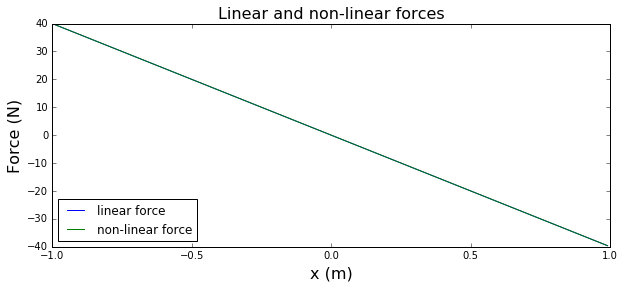

In [76]:
plt.figure(0, figsize=(10, 4))
plt.plot(x, linearforce(k1,x), label = 'linear force')
plt.plot(x, nonlinearforce(k1,k2,x), label = 'non-linear force')
plt.xlabel('x (m)', fontsize = 16)
plt.ylabel('Force (N)', fontsize = 16)
plt.title('Linear and non-linear forces', fontsize = 16)
plt.legend(loc='lower left')
plt.savefig('force-zero.png', dpi=200)
# plt.savefig('force.pdf')
plt.show()

### Plotting the response of the system to the particular intial conditions

Again, you don't really have to worry about what all this code does, you just have to examine the results and try and interpret them much as you would interpret an experiment. 

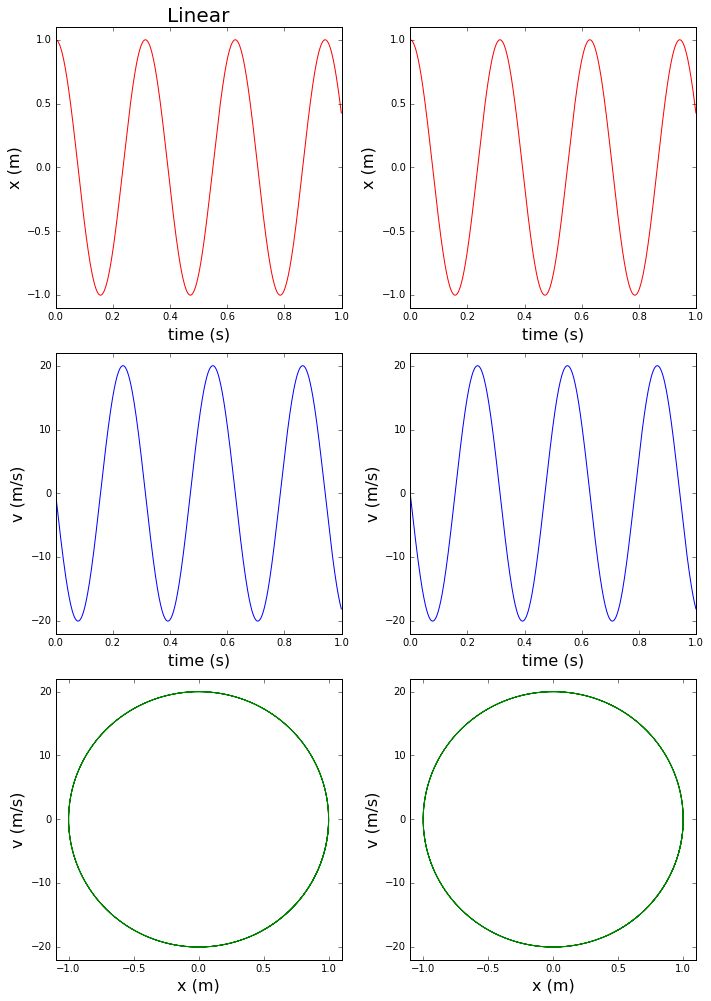

In [77]:
# some code to make sure the graphs are all scaled correctly
xmax = 1.1*max(np.amax(solution_linear[:,0]),np.amax(solution_nonlinear[:,0]))
xmin = 1.1*min(np.amin(solution_linear[:,0]),np.amin(solution_nonlinear[:,0]))
vmax = 1.1*max(np.amax(solution_linear[:,1]),np.amax(solution_nonlinear[:,1]))
vmin = 1.1*min(np.amin(solution_linear[:,1]),np.amin(solution_nonlinear[:,1]))

fig = plt.figure(1, figsize=(10,14))
# x(t)
subplot1 = fig.add_subplot(321)
subplot1.plot(t, solution_linear[:,0],'r-')
subplot1.set_xlabel('time (s)', fontsize = 16)
subplot1.set_ylabel('x (m)', fontsize = 16)
subplot1.set_ylim(xmin, xmax)
subplot1.set_title('Linear', fontsize = 20)

# v(t) 
subplot2 = fig.add_subplot(323)
subplot2.plot(t, solution_linear[:,1], 'b-')
subplot2.set_xlabel('time (s)',fontsize = 16)
subplot2.set_ylabel('v (m/s)', fontsize = 16)
subplot2.set_ylim(vmin, vmax)

# v(x)
subplot3 = fig.add_subplot(325)
subplot3.plot(solution_linear[:,0], solution_linear[:,1], 'g-')
subplot3.set_xlabel('x (m)', fontsize = 16)
subplot3.set_ylabel('v (m/s)', fontsize = 16)
subplot3.set_xlim(xmin, xmax)
subplot3.set_ylim(vmin, vmax)
#ax3.axis('equal')

# x(t)
subplot4 = fig.add_subplot(322)
subplot4.plot(t, solution_nonlinear[:,0],'r-')
subplot4.set_xlabel('time (s)', fontsize = 16)
subplot4.set_ylabel('x (m)', fontsize = 16)
subplot4.set_ylim(xmin, xmax)

# v(t) 
subplot5 = fig.add_subplot(324)
subplot5.plot(t, solution_nonlinear[:,1], 'b-')
subplot5.set_xlabel('time (s)',fontsize = 16)
subplot5.set_ylabel('v (m/s)', fontsize = 16)
subplot5.set_ylim(vmin, vmax)

# v(x)
subplot6 = fig.add_subplot(326)
subplot6.plot(solution_nonlinear[:,0], solution_nonlinear[:,1], 'g-')
subplot6.set_xlabel('x (m)', fontsize = 16)
subplot6.set_ylabel('v (m/s)', fontsize = 16)
subplot6.set_xlim(xmin, xmax)
subplot6.set_ylim(vmin, vmax)
#ax3.axis('equal')

plt.tight_layout()

# uncomment one of the following lines 
# if you want a png or a pdf file output
plt.savefig('masspring-linearandnonlinear-zero.png', dpi=300)
# plt.savefig('masspring-linearandnonlinear.pdf')
plt.show()

### TASKS
Some things you could investigate:
 - **a** set $k_2$ to +15 n/m$^2$ and explain the changes
 - **b** set $k_2$ to -15 n/m$^2$ and explain the changes
 
Feel free to change the mass and the initial conditions and investigate how these changes affect the subsequent motion of the system. 